In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# MovieLens

# SVD
MAEs = [0.687257256688152, 0.6869830942378093, 0.6869100127319322]
RMSEs = [0.8730051634217075, 0.8738142548247319, 0.8740449056652272]

# SVD++
MAEs, RMSEs = 

# SlopeOne
MAEs= [0.7148878249388203, 0.7145574713060954, 0.7150321006176992]
RMSEs = [0.9076499813312154, 0.905850394357351, 0.9069525047455289]

# NMF
MAEs = [0.7265435365676495, 0.7257131086228752, 0.7249458856767959]
RMSEs = [0.9181275254669226, 0.917495345966327, 0.9174886045899417]


# NormalPredictor
MAEs = [1.2554733254042276, 1.2564647985287716, 1.2534671256324974]
RMSEs = [1.5622074355137692, 1.561460814515582, 1.5597064909575111]

# KNNBasic
MAEs = [0.7271722076337452, 0.7265231131752835, 0.7277968372651059]
RMSEs = [0.9230891853101716, 0.9209037255257612, 0.9238605162531881]

# KNNWithMeans
MAEs = [0.7362578792992681, 0.7384688254787456, 0.738251073642608]
RMSEs = [0.9255873175935208, 0.9283086757564283, 0.9291180388611351]

# KNNWithZScore
MAEs = [0.7383136866237121, 0.7353883365988527, 0.736422543586348]
RMSEs = [0.9324730365845533, 0.9286302247376513, 0.9301454377513159]

# KNNBaseline
MAEs = [0.7063820835562759, 0.7058765023753925, 0.7073667704909674]
RMSEs = [0.8948887300686519, 0.8943867387359578, 0.8956816724775822]

In [38]:
arr2 = {"SVD": 4.53, "SVD++": 4.8872, "CoClustering": 4.28,\
        "Unit-Consistent (ours)": 5.55, "NMF":7.04, "Slope One":7.23, "NormalPredictor" :7.27}
arr1 = {"SVD++":0.8551, "SVD": 0.8667,"Slope One":0.9059, \
    "CoClustering": 0.9125, "NMF": 0.9166, "Unit-Consistent (ours)": 0.9346,"NormalPredictor": 1.5047}

In [70]:
# create new tuples 
arr = {}
for key, val in arr1.items():
    arr[key] = [val]

# combine arrays:
for key, val in arr2.items():
    arr[key].append(arr2[key])
    
tuples = []
for key, val in arr.items():
    tuples.append((val[0], val[1], key))

tuples.sort()
print(tuples)

[(0.8551, 4.8872, 'SVD++'), (0.8667, 4.53, 'SVD'), (0.9059, 7.23, 'Slope One'), (0.9125, 4.28, 'CoClustering'), (0.9166, 7.04, 'NMF'), (0.9346, 5.55, 'Unit-Consistent (ours)'), (1.5047, 7.27, 'NormalPredictor')]


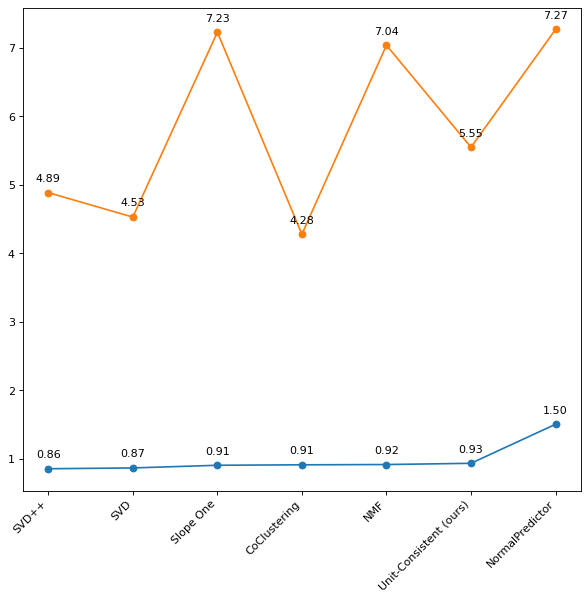

In [68]:
y_val = list(arr.values())
X = range(1,len(arr)+1)
plt.figure(figsize=(9, 8), dpi=80)
Y1 = [y[0] for y in y_val]
Y2 = [y[1] for y in y_val]
plt.xticks(X, list(arr.keys()), rotation=45, ha="right")
plt.plot(X, Y1, marker="o")
plt.plot(X, Y2, marker="o")
for x,y1, y2 in zip(X, Y1, Y2):
    label = "{:.2f}".format(y1)
    plt.annotate(label, (x, y1), ha='center', xytext=(0,10), textcoords="offset points")
    label = "{:.2f}".format(y2)
    plt.annotate(label, (x, y2), ha='center', xytext=(0,10), textcoords="offset points")
plt.show()

In [87]:
mean1 = np.std(y1)
std = []
for (y1, y2, _) in tuples:
    mean.append(np.mean([y1,y2]))
    std.append(np.std([y1,y2]))
print(mean, std)

[2.87115, 2.69835, 4.067950000000001, 2.59625, 3.9783, 3.2422999999999997, 4.38735] [2.01605, 1.8316500000000002, 3.1620500000000002, 1.68375, 3.0617, 2.3077, 2.88265]


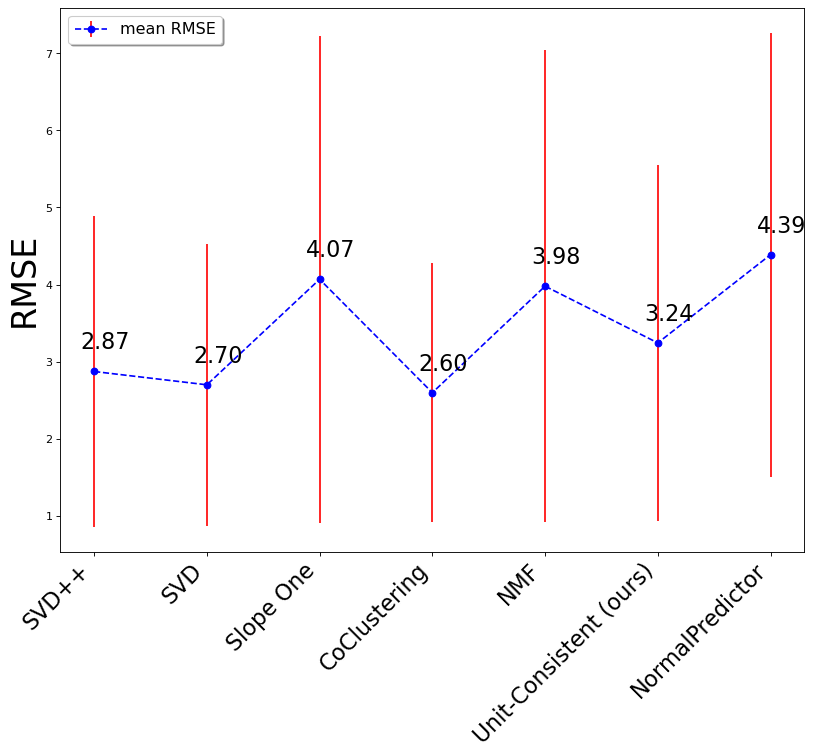

In [200]:
y_val = list(arr.values())
X = range(1,len(tuples)+1)
labels = [y[2] for y in tuples]
Y1 = [y[0] for y in tuples]
Y2 = [y[1] for y in tuples]

# Both datasets
#plt.plot(X, Y1, marker="o", ls ='--', label = "movielens", color = 'purple')
#plt.plot(X, Y2, marker="o", ls ='--',)
# plt.bar(X, Y2)
# plt.bar(X, Y1)
# plt.plot(X, mean, marker="o")
# plt.bar(X, mean)
plt.figure(figsize=(12, 9), dpi=80)
plt.xticks(X, labels, rotation=45, ha="right", size = 20)
# mean and std
plt.errorbar(X, mean, yerr = std,fmt='o',ecolor = 'red',color='blue', ls ='--', label = "mean RMSE")
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
for x,y1, y2, m in zip(X, Y1, Y2, mean):
#     label = "{:.2f}".format(y1)
#     plt.annotate(label, (x, y1), ha='center', xytext=(0,-10), textcoords="offset points", size = 15)
#     label = "{:.2f}".format(y2)
#     plt.annotate(label, (x, y2), ha='center', xytext=(0,10), textcoords="offset points")
    label = "{:.2f}".format(m)
    plt.annotate(label, (x, m), ha='center', xytext=(10,20), textcoords="offset points", size = 20)
plt.ylabel("RMSE", size = 30)
plt.show()

In [213]:
std1 = [np.std(np.array(Y1))]*len(Y1)
std2 = [np.std(np.array(Y2))]*len(Y2)
std_m = [np.std(np.array(mean))]*len(mean)
print(std1)

[0.21370493581533564, 0.21370493581533564, 0.21370493581533564, 0.21370493581533564, 0.21370493581533564, 0.21370493581533564, 0.21370493581533564]


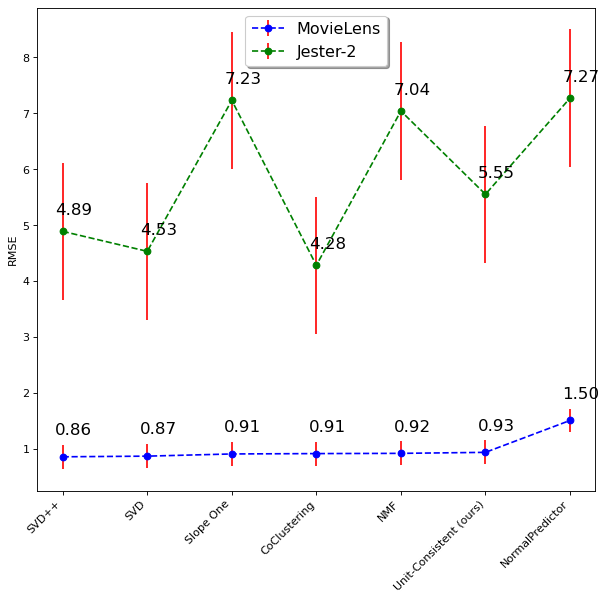

In [216]:
plt.figure(figsize=(9, 8), dpi=80)
plt.xticks(X, labels, rotation=45, ha="right")
# mean and std
plt.errorbar(X, Y1, yerr = std1,fmt='o',ecolor = 'red',color='blue', ls ='--', label = 'MovieLens')
plt.errorbar(X, Y2, yerr = std2,fmt='o',ecolor = 'red',color='green', ls ='--', label = 'Jester-2')
# plt.errorbar(X, mean, yerr = std_m,fmt='o',ecolor = 'red',color='green', ls ='--', label = 'Mean')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
for x,y1, y2, m in zip(X, Y1, Y2, mean):
    label = "{:.2f}".format(y1)
    plt.annotate(label, (x, y1), ha='center', xytext=(10,20), textcoords="offset points", size = 15)
    label = "{:.2f}".format(y2)
    plt.annotate(label, (x, y2), ha='center', xytext=(10,15), textcoords="offset points", size = 15)
#     label = "{:.2f}".format(m)
#     plt.annotate(label, (x, m), ha='center', xytext=(20,10), textcoords="offset points")
plt.ylabel("RMSE")
plt.show()